<a href="https://colab.research.google.com/github/2303a51851/PDS-Project/blob/main/The_PDS_final_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✅ scikit-learn version: 1.6.1
✅ Data Loaded. Shape: (16032, 25)
📋 Columns: ['Year', 'State Name', 'Dist Name', 'RICE YIELD (Kg per ha)', 'KHARIF SORGHUM YIELD (Kg per ha)', 'PEARL MILLET YIELD (Kg per ha)', 'MAIZE YIELD (Kg per ha)', 'FINGER MILLET YIELD (Kg per ha)', 'PIGEONPEA YIELD (Kg per ha)', 'MINOR PULSES YIELD (Kg per ha)', 'SESAMUM YIELD (Kg per ha)', 'SAFFLOWER YIELD (Kg per ha)', 'CASTOR YIELD (Kg per ha)', 'SUNFLOWER YIELD (Kg per ha)', 'SOYABEAN YIELD (Kg per ha)', 'OILSEEDS YIELD (Kg per ha)', 'SUGARCANE YIELD (Kg per ha)', 'COTTON YIELD (Kg per ha)', 'NITROGEN PER HA OF GCA (Kg per ha)', 'PHOSPHATE PER HA OF GCA (Kg per ha)', 'POTASH PER HA OF GCA (Kg per ha)', 'AVERAGE RAINFALL (Millimeters)', 'AVERAGE TEMPERATURE (Centigrate)', 'AVERAGE PERCIPITATION (Millimeters)', 'SOIL TYPE PERCENT1 (Percent)']

🎯 Target Column: RICE YIELD (Kg per ha)
🔢 Numeric Features: 21 | 🧩 Categorical: 3

📌 Model: Linear Regression
✅ R²: 0.7939 | MAE: 315.0360 | RMSE: 433.6655
📌 Model: Ridge
✅ 

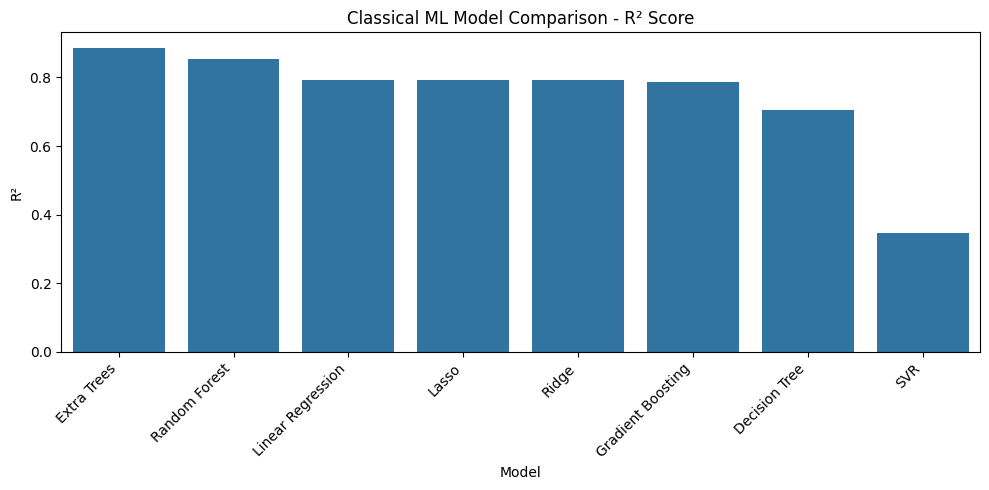

📌 Training Model: MLP_128_64
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
✅ R²: 0.8559 | MAE: 249.2020 | RMSE: 362.5955


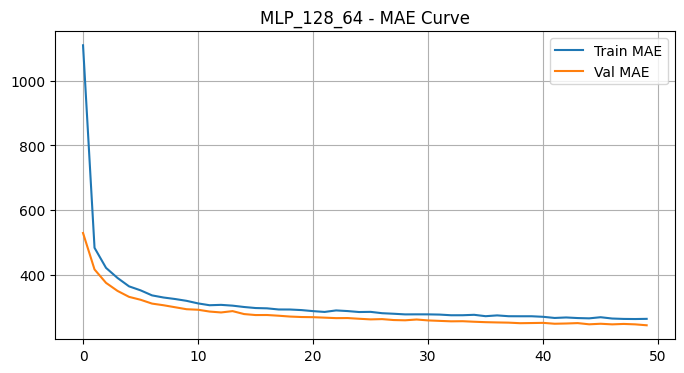

📌 Training Model: MLP_256_128
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
✅ R²: 0.8649 | MAE: 236.1573 | RMSE: 351.0818


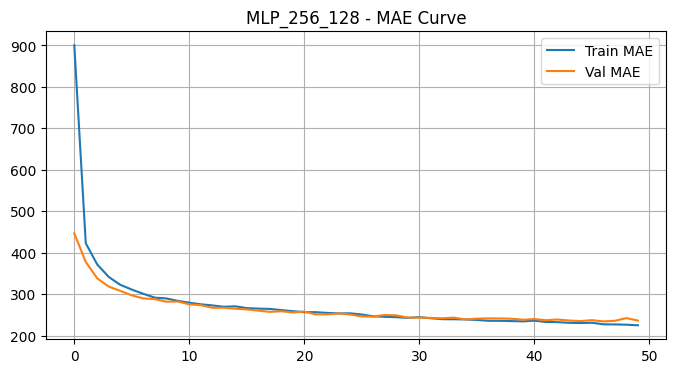

📌 Training Model: MLP_64_32
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
✅ R²: 0.8442 | MAE: 266.4516 | RMSE: 377.1252


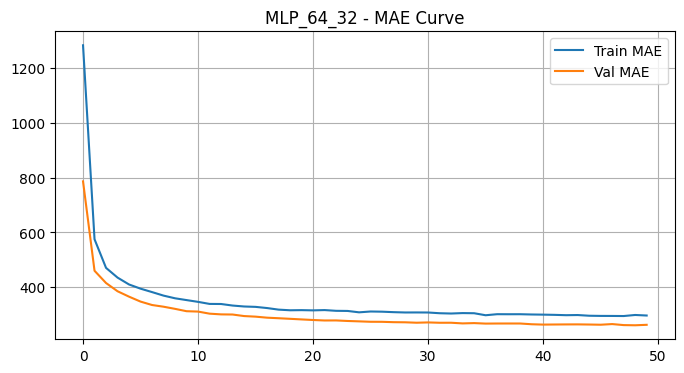


📊 Deep Learning Summary:
          Model        R²         MAE        RMSE
1  MLP_256_128  0.864935  236.157306  351.081802
0   MLP_128_64  0.855931  249.202027  362.595474
2    MLP_64_32  0.844153  266.451613  377.125246


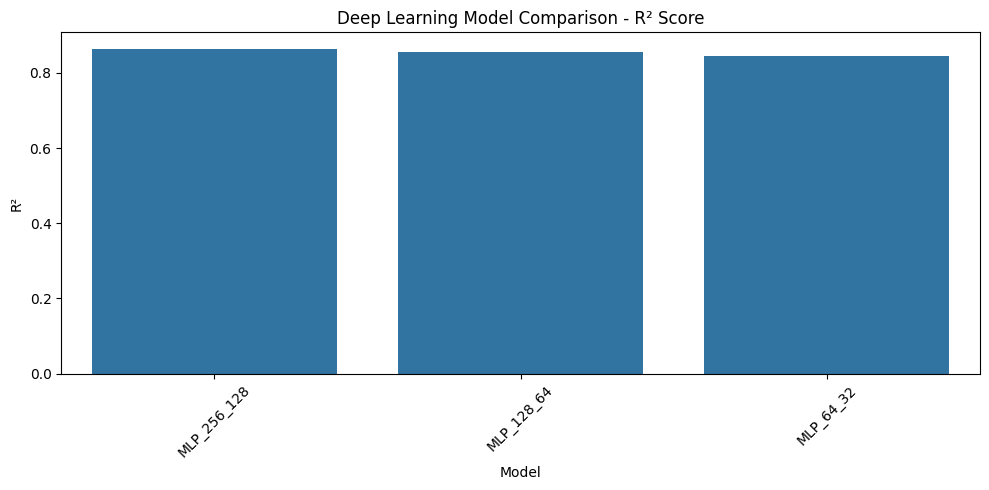

📌 Model: Bagging (RF)
✅ R²: 0.8371 | MAE: 272.3382 | RMSE: 385.6173
📌 Model: AdaBoost (DT)
✅ R²: 0.8632 | MAE: 234.2954 | RMSE: 353.2965
📌 Model: Voting (RF+GB+DT)
✅ R²: 0.8213 | MAE: 291.8056 | RMSE: 403.7851

📊 Weak Ensemble Summary:
                Model        R²         MAE        RMSE
1      AdaBoost (DT)  0.863225  234.295413  353.296452
0       Bagging (RF)  0.837055  272.338191  385.617343
2  Voting (RF+GB+DT)  0.821340  291.805635  403.785134


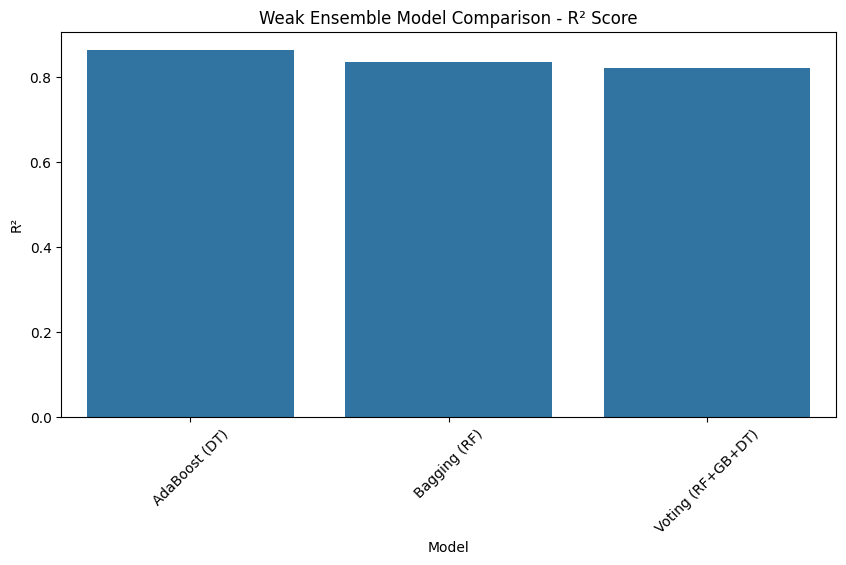

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 9.8 MB/s eta 0:00:00
🧩 Detected categorical features: ['State Name', 'Dist Name', 'SOIL TYPE PERCENT1 (Percent)']
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

✅ PH-CRS Hybrid Results:
R²=0.8425 | MAE=254.8016 | RMSE=379.1743


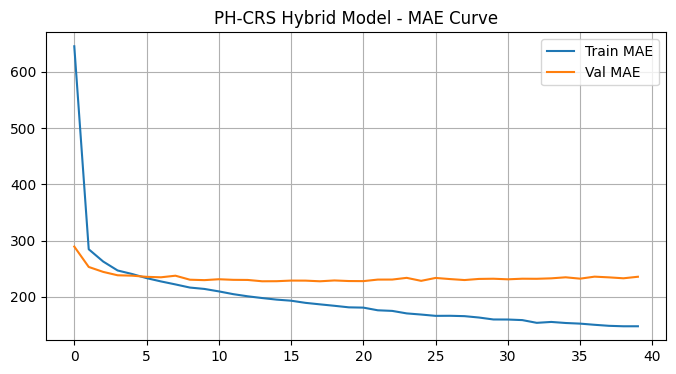



📊 FINAL MODEL PERFORMANCE SUMMARY:
                           Model        R²
0                   Extra Trees  0.887268
8                   MLP_256_128  0.864935
11                AdaBoost (DT)  0.863225
9                    MLP_128_64  0.855931
1                 Random Forest  0.855108
10                    MLP_64_32  0.844153
14  PH-CRS (Hybrid CatBoost+NN)  0.842455
12                 Bagging (RF)  0.837055
13            Voting (RF+GB+DT)  0.821340
2             Linear Regression  0.793920
3                         Lasso  0.793911
4                         Ridge  0.793200
5             Gradient Boosting  0.786176
6                 Decision Tree  0.703888
7                           SVR  0.345487


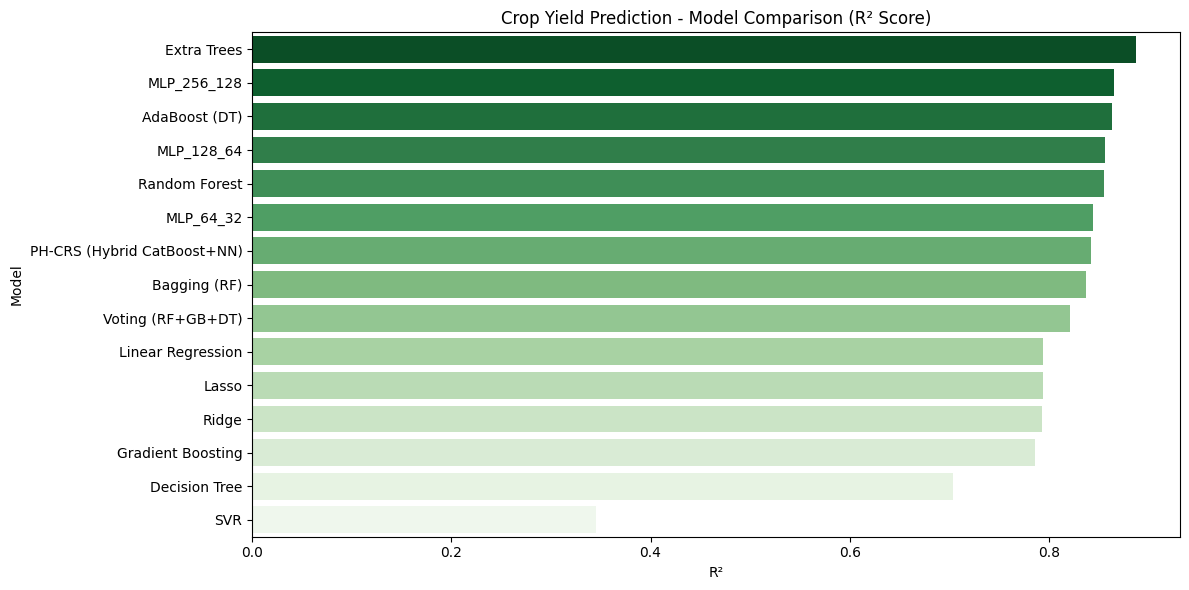

In [1]:
# ===============================================================
# 🌾 Crop Yield Prediction System - PH-CRS
# ===============================================================

# ---------------------------
# Suppress warnings and logs
# ---------------------------
import warnings, os
warnings.filterwarnings("ignore")
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=UserWarning)

# ---------------------------
# Basic imports
# ---------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

import sklearn
from packaging import version
print(f"✅ scikit-learn version: {sklearn.__version__}")

from sklearn.pipeline import Pipeline

# ===============================================================
# Load Dataset
# ===============================================================
df = pd.read_csv("/content/Crop_Yield_Prediction .csv")  # 👈 ensure correct path
print(f"✅ Data Loaded. Shape: {df.shape}")
print(f"📋 Columns: {df.columns.tolist()}\n")

# Auto-clean column names (strip spaces)
df.columns = [c.strip() for c in df.columns]

# ===============================================================
# Feature & Target Split
# ===============================================================
target_candidates = [c for c in df.columns if "yield" in c.lower() or "production" in c.lower()]
if not target_candidates:
    raise ValueError("❌ No target column found with 'yield' or 'production' in its name.")
target_col = target_candidates[0]
print(f"🎯 Target Column: {target_col}")

X = df.drop(columns=[target_col])
y = df[target_col].astype(float)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Identify column types
numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X.select_dtypes(exclude=[np.number]).columns.tolist()
print(f"🔢 Numeric Features: {len(numeric_features)} | 🧩 Categorical: {len(categorical_features)}\n")

# Preprocessing
preprocess = ColumnTransformer([
    ("num", StandardScaler(), numeric_features),
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
])

# ===============================================================
# Helper Function
# ===============================================================
def compute_rmse(y_true, y_pred):
    try:
        return mean_squared_error(y_true, y_pred, squared=False)
    except TypeError:
        return np.sqrt(mean_squared_error(y_true, y_pred))

# ===============================================================
# 1️⃣ Classical ML Regression Comparison
# ===============================================================
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.svm import SVR

models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.001),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=150, random_state=42),
    "Extra Trees": ExtraTreesRegressor(n_estimators=150, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=200, random_state=42),
    "SVR": SVR()
}

summary = []
for name, model in models.items():
    print("="*80)
    print(f"📌 Model: {name}")
    pipe = Pipeline([("preprocess", preprocess), ("reg", model)])
    pipe.fit(X_train, y_train)
    preds = pipe.predict(X_test)
    r2 = r2_score(y_test, preds)
    mae = mean_absolute_error(y_test, preds)
    rmse = compute_rmse(y_test, preds)
    print(f"✅ R²: {r2:.4f} | MAE: {mae:.4f} | RMSE: {rmse:.4f}")
    summary.append({"Model": name, "R²": r2, "MAE": mae, "RMSE": rmse})

summary_df = pd.DataFrame(summary).sort_values(by="R²", ascending=False)
print("\n📊 ML Regression Summary:\n", summary_df)
plt.figure(figsize=(10,5))
sns.barplot(x="Model", y="R²", data=summary_df)
plt.xticks(rotation=45, ha="right")
plt.title("Classical ML Model Comparison - R² Score")
plt.tight_layout()
plt.show()

# ===============================================================
# 2️⃣ Deep Learning Regression (MLP)
# ===============================================================
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

X_train_prep = preprocess.fit_transform(X_train)
X_test_prep = preprocess.transform(X_test)

def create_mlp(input_dim, hidden_layers=[128, 64], dropout=0.2):
    model = Sequential()
    model.add(Dense(hidden_layers[0], activation='relu', input_shape=(input_dim,)))
    model.add(Dropout(dropout))
    for units in hidden_layers[1:]:
        model.add(Dense(units, activation='relu'))
        model.add(Dropout(dropout))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

mlp_models = {
    "MLP_128_64": create_mlp(X_train_prep.shape[1], [128, 64]),
    "MLP_256_128": create_mlp(X_train_prep.shape[1], [256, 128]),
    "MLP_64_32": create_mlp(X_train_prep.shape[1], [64, 32])
}

summary_dl = []
for name, model in mlp_models.items():
    print("="*80)
    print(f"📌 Training Model: {name}")
    hist = model.fit(X_train_prep, y_train, validation_split=0.2,
                     epochs=50, batch_size=32, verbose=0)
    preds = model.predict(X_test_prep).flatten()
    r2 = r2_score(y_test, preds)
    mae = mean_absolute_error(y_test, preds)
    rmse = compute_rmse(y_test, preds)
    print(f"✅ R²: {r2:.4f} | MAE: {mae:.4f} | RMSE: {rmse:.4f}")
    summary_dl.append({"Model": name, "R²": r2, "MAE": mae, "RMSE": rmse})
    plt.figure(figsize=(8,4))
    plt.plot(hist.history["mae"], label="Train MAE")
    plt.plot(hist.history["val_mae"], label="Val MAE")
    plt.title(f"{name} - MAE Curve")
    plt.legend()
    plt.grid(True)
    plt.show()

summary_dl_df = pd.DataFrame(summary_dl).sort_values(by="R²", ascending=False)
print("\n📊 Deep Learning Summary:\n", summary_dl_df)
plt.figure(figsize=(10,5))
sns.barplot(x="Model", y="R²", data=summary_dl_df)
plt.xticks(rotation=45)
plt.title("Deep Learning Model Comparison - R² Score")
plt.tight_layout()
plt.show()

# ===============================================================
# 3️⃣ Weak Ensemble Regression
# ===============================================================
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor, VotingRegressor

base1 = RandomForestRegressor(n_estimators=50, random_state=42)
base2 = GradientBoostingRegressor(n_estimators=50, random_state=42)
base3 = DecisionTreeRegressor(random_state=42)

models_ens = {
    "Bagging (RF)": BaggingRegressor(estimator=base1, n_estimators=10, random_state=42),
    "AdaBoost (DT)": AdaBoostRegressor(estimator=base3, n_estimators=50, random_state=42),
    "Voting (RF+GB+DT)": VotingRegressor(estimators=[("rf", base1), ("gb", base2), ("dt", base3)])
}

summary_ens = []
for name, model in models_ens.items():
    print("="*80)
    print(f"📌 Model: {name}")
    pipe = Pipeline([("preprocess", preprocess), ("reg", model)])
    pipe.fit(X_train, y_train)
    preds = pipe.predict(X_test)
    r2 = r2_score(y_test, preds)
    mae = mean_absolute_error(y_test, preds)
    rmse = compute_rmse(y_test, preds)
    print(f"✅ R²: {r2:.4f} | MAE: {mae:.4f} | RMSE: {rmse:.4f}")
    summary_ens.append({"Model": name, "R²": r2, "MAE": mae, "RMSE": rmse})

summary_ens_df = pd.DataFrame(summary_ens).sort_values(by="R²", ascending=False)
print("\n📊 Weak Ensemble Summary:\n", summary_ens_df)
plt.figure(figsize=(10,5))
sns.barplot(x="Model", y="R²", data=summary_ens_df)
plt.xticks(rotation=45)
plt.title("Weak Ensemble Model Comparison - R² Score")
plt.show()

# ===============================================================
# 4️⃣ PH-CRS Hybrid (CatBoost + NN)
# ===============================================================
!pip install -q catboost
from catboost import CatBoostRegressor

# detect categorical features
cat_features = X_train.select_dtypes(include=["object", "category"]).columns.tolist()
print(f"🧩 Detected categorical features: {cat_features}")

cat = CatBoostRegressor(
    iterations=150,
    learning_rate=0.1,
    depth=6,
    cat_features=cat_features,
    random_seed=42,
    verbose=False
)
cat.fit(X_train, y_train, cat_features=cat_features)

# get leaf indexes
leaf_idx_train = cat.calc_leaf_indexes(X_train)
leaf_idx_test = cat.calc_leaf_indexes(X_test)

X_train_nn = tf.keras.utils.to_categorical(leaf_idx_train.flatten()).reshape(leaf_idx_train.shape[0], -1)
X_test_nn = tf.keras.utils.to_categorical(leaf_idx_test.flatten()).reshape(leaf_idx_test.shape[0], -1)

model_hybrid = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_nn.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(1)
])
model_hybrid.compile(optimizer='adam', loss='mse', metrics=['mae'])
hist = model_hybrid.fit(X_train_nn, y_train, validation_split=0.2,
                        epochs=40, batch_size=32, verbose=0)

preds = model_hybrid.predict(X_test_nn).flatten()
r2 = r2_score(y_test, preds)
mae = mean_absolute_error(y_test, preds)
rmse = compute_rmse(y_test, preds)

print(f"\n✅ PH-CRS Hybrid Results:\nR²={r2:.4f} | MAE={mae:.4f} | RMSE={rmse:.4f}")

plt.figure(figsize=(8,4))
plt.plot(hist.history["mae"], label="Train MAE")
plt.plot(hist.history["val_mae"], label="Val MAE")
plt.title("PH-CRS Hybrid Model - MAE Curve")
plt.legend(); plt.grid(True); plt.show()

# ===============================================================
# 📈 Final Comparison
# ===============================================================
final_results = pd.concat([
    summary_df[["Model", "R²"]],
    summary_dl_df[["Model", "R²"]],
    summary_ens_df[["Model", "R²"]],
    pd.DataFrame([{"Model": "PH-CRS (Hybrid CatBoost+NN)", "R²": r2}])
], ignore_index=True).sort_values(by="R²", ascending=False)

print("\n\n📊 FINAL MODEL PERFORMANCE SUMMARY:\n", final_results)
plt.figure(figsize=(12,6))
sns.barplot(x="R²", y="Model", data=final_results, palette="Greens_r")
plt.title("Crop Yield Prediction - Model Comparison (R² Score)")
plt.tight_layout()
plt.show()
